In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle

In [2]:
## Load the dataset
data=pd.read_csv("Churn_Modelling.csv")
print(data.shape)
data.head(3)

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [3]:
## Preprocess the data
### Drop irrelevant columns
cust_ids = data['CustomerId']
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [4]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [5]:
## Encode categorical variables
label_encoder_gender=LabelEncoder()
data['gender_male']= (data['Gender'] == 'Male').astype(int) #label_encoder_gender.fit_transform(data['Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender_male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1


In [6]:
## Onehot encode 'Geography
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo=OneHotEncoder()
geo_encoder=onehot_encoder_geo.fit_transform(data[['Geography']]).toarray()
geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [7]:
onehot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [8]:
geo_encoded_df=pd.DataFrame(geo_encoder,columns=onehot_encoder_geo.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [9]:
## Combine one hot encoder columns with the original data
data=pd.concat([data.drop('Geography',axis=1),geo_encoded_df],axis=1)
data.drop('Gender',axis=1, inplace=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender_male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,1.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0.0,0.0,1.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0.0,0.0,1.0


In [10]:
## Save the encoders and sscaler
# with open('label_encoder_gender.pkl','wb') as file:
#     pickle.dump(label_encoder_gender,file)

with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehot_encoder_geo,file)


In [11]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender_male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,1.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0.0,0.0,1.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0.0,0.0,1.0


In [12]:
## DiVide the dataset into indepent and dependent features
X=data.drop('Exited',axis=1)
y=data['Exited']

## Split the data in training and tetsing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
X_train.loc[X_train['EstimatedSalary'] < 1200, 'EstimatedSalary'].describe()

count      53.000000
mean      642.954717
std       307.356862
min        90.070000
25%       440.200000
50%       667.660000
75%       861.400000
max      1187.880000
Name: EstimatedSalary, dtype: float64

In [14]:
# X_train.loc[X_train['EstimatedSalary'] < 1200, 'EstimatedSalary'] = 1200
# X_test.loc[X_test['EstimatedSalary'] < 1200, 'EstimatedSalary'] = 1200

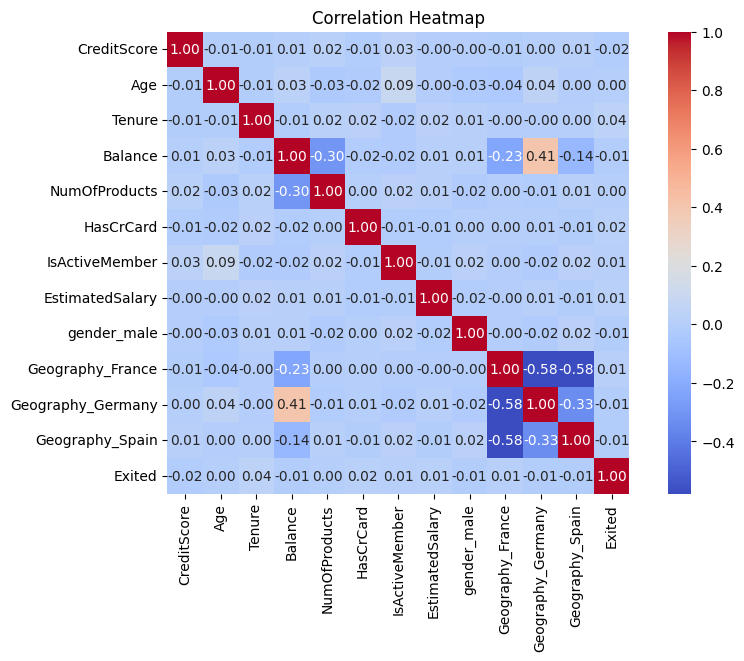

In [15]:
## Data exploration:
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.concat([pd.DataFrame(X_train, columns=X.columns), pd.Series(y_train.values)], axis=1)
train.columns = train.columns.tolist()[:-1] + ['Exited']

plt.figure(figsize=(10, 6))
corr_df = train.corr()
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,gender_male,Geography_France,Geography_Germany,Geography_Spain,Exited
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,651.647625,38.897750,5.003875,76102.139645,1.531375,0.703500,0.512750,100431.289764,0.545250,0.499250,0.251375,0.249375,0.205500
std,96.366200,10.518953,2.881822,62461.005757,0.579705,0.456743,0.499869,57518.920431,0.497979,0.500031,0.433831,0.432678,0.404092
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,585.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51364.125000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,653.000000,37.000000,5.000000,96447.520000,1.000000,1.000000,1.000000,100487.720000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,719.000000,44.000000,7.000000,127611.332500,2.000000,1.000000,1.000000,149595.842500,1.000000,1.000000,1.000000,0.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
data['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 12), (2000, 12), (8000,), (2000,))

In [19]:
# In your model training script, after all preprocessing and before scaler.fit()
final_features = X_train.columns.tolist()

# Save this list to a pickle file
with open('final_features.pkl', 'wb') as file:
    pickle.dump(final_features, file)

In [20]:
## Scale these features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [21]:
X_train[0]

array([ 0.35649971, -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,
        0.64920267,  0.97481699,  1.36766974,  0.91324755,  1.00150113,
       -0.57946723, -0.57638802])

In [22]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

### ANN Implementation

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [24]:
(X_train.shape[1],)

(12,)

In [25]:
## Build Our ANN Model
model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)), ## HL1 Connected wwith input layer
    Dense(32,activation='relu'), ## HL2
    Dense(1,activation='sigmoid')  ## output layer
]

)

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


In [27]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
loss=tensorflow.keras.losses.BinaryCrossentropy()
loss

In [28]:
## compile the model
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy'])

In [29]:
## Set up the Tensorboard
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [30]:
## Set up Early Stopping
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)


In [31]:
### Train the model
history=model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4000 - accuracy: 0.8338 - val_loss: 0.3670 - val_accuracy: 0.8520
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3584 - accuracy: 0.8535 - val_loss: 0.3434 - val_accuracy: 0.8570
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3516 - accuracy: 0.8589 - val_loss: 0.3602 - val_accuracy: 0.8535
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3434 - accuracy: 0.8589 - val_loss: 0.3587 - val_accuracy: 0.8565
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3458 - accuracy: 0.8616 - val_loss: 0.3378 - val_accuracy: 0.8635
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3401 - accuracy: 0.8584 - val_loss: 0.3522 - val_accuracy: 0.8565
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3383 - accuracy: 0.8604 - val_loss: 0.3452 - val_accuracy: 0.8560

In [32]:
# # In your model training script, after all preprocessing and before scaler.fit()
# final_features = X_train.columns.tolist()

# # Save this list to a pickle file
# with open('final_features.pkl', 'wb') as file:
#     pickle.dump(final_features, file)

In [33]:
model.save('model.h5')

In [34]:
## Load Tensorboard Extension
%load_ext tensorboard

In [35]:
# %tensorboard --logdir logs/fit